<a href="https://colab.research.google.com/github/Abhishek264/ml-bootcamp/blob/main/Ad_spending_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('/content/advertising.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [4]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 0:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 1:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 2:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 3:36:18,0


In [5]:
data.corr()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
Daily Time Spent on Site,1.000000,-0.331513,0.310954,0.518658,-0.018951,-0.748117
Age,-0.331513,1.000000,-0.182605,-0.367209,-0.021044,0.492531
Area Income,0.310954,-0.182605,1.000000,0.337496,0.001322,-0.476255
Daily Internet Usage,0.518658,-0.367209,0.337496,1.000000,0.028012,-0.786539
Male,-0.018951,-0.021044,0.001322,0.028012,1.000000,-0.038027
Clicked on Ad,-0.748117,0.492531,-0.476255,-0.786539,-0.038027,1.000000


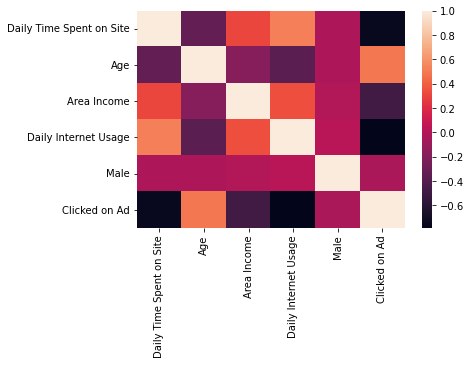

In [6]:
sns.heatmap(data.corr())

In [7]:
data.City.value_counts()

Lisamouth         3
Williamsport      3
Wrightburgh       2
Lake Jose         2
Robertfurt        2
                 ..
Burgessside       1
Hurleyborough     1
Garychester       1
East Kevinbury    1
Ronniemouth       1
Name: City, Length: 969, dtype: int64

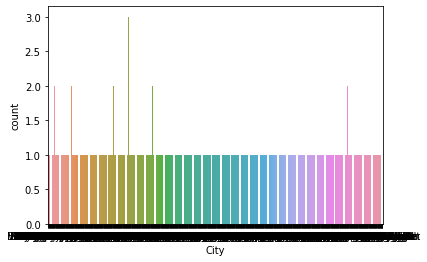

In [8]:
sns.countplot(x=data.City)

In [9]:
data.Country.value_counts()

France                                                 9
Czech Republic                                         9
Peru                                                   8
Turkey                                                 8
Greece                                                 8
                                                      ..
Romania                                                1
British Indian Ocean Territory (Chagos Archipelago)    1
Germany                                                1
Aruba                                                  1
Lesotho                                                1
Name: Country, Length: 237, dtype: int64

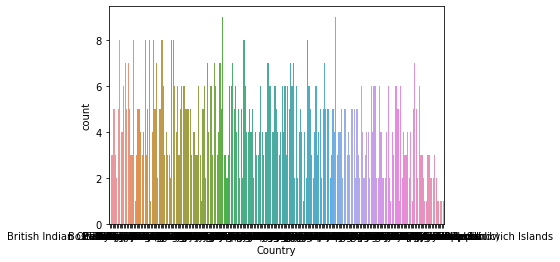

In [10]:
sns.countplot(x=data.Country)

In [11]:
dates = pd.to_datetime(data.Timestamp)

In [12]:
data['hour'] = dates.apply(lambda x:x.hour)

In [13]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,hour
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 0:53:11,0,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 1:39:02,0,1
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,20
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 2:31:19,0,2
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 3:36:18,0,3


In [14]:
data['min'] = dates.apply(lambda x:x.minute)

In [15]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,hour,min
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 0:53:11,0,0,53
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 1:39:02,0,1,39
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,20,35
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 2:31:19,0,2,31
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 3:36:18,0,3,36


In [16]:
X = data.drop(['Clicked on Ad', 'City', 'Ad Topic Line', 'Timestamp'],axis=1)
y = data['Clicked on Ad']

In [18]:
X

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Country,hour,min
0,68.95,35,61833.90,256.09,0,Tunisia,0,53
1,80.23,31,68441.85,193.77,1,Nauru,1,39
2,69.47,26,59785.94,236.50,0,San Marino,20,35
3,74.15,29,54806.18,245.89,1,Italy,2,31
4,68.37,35,73889.99,225.58,0,Iceland,3,36
...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,Lebanon,21,49
996,51.30,45,67782.17,134.42,1,Bosnia and Herzegovina,2,7
997,51.63,51,42415.72,120.37,1,Mongolia,17,24
998,55.55,19,41920.79,187.95,0,Guatemala,2,35


In [19]:
y

0      0
1      0
2      0
3      0
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: Clicked on Ad, Length: 1000, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train.iloc[:, :4] = sc.fit_transform(X_train.iloc[:, :4])
X_test.iloc[:, :4] = sc.transform(X_test.iloc[:, :4])
X_train.iloc[:, 6:] = sc.fit_transform(X_train.iloc[:, 6:])
X_test.iloc[:, 6:] = sc.transform(X_test.iloc[:, 6:])

In [22]:
X_train

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Country,hour,min
513,-0.353856,0.863288,-0.384408,-1.666605,1,Turkey,0.778585,-1.063321
351,0.562154,-1.502270,0.135099,0.748208,1,El Salvador,-0.932982,0.333584
535,0.879428,-0.488460,1.118948,0.671184,1,Uruguay,-0.219829,-1.470751
51,0.953563,-0.939042,0.276055,1.067081,0,United Kingdom,1.349107,-0.597686
850,0.868119,-0.375814,-0.219510,1.636054,1,Vanuatu,-0.219829,0.391788
...,...,...,...,...,...,...,...,...
682,-1.331436,-0.037877,-0.278275,-1.227382,1,French Polynesia,0.778585,0.217175
158,0.986233,-1.051688,0.503519,0.669808,1,Costa Rica,-1.360874,-0.946912
903,1.256387,-0.713751,0.460464,-0.001177,0,Venezuela,1.634368,-1.237934
114,0.266241,-0.488460,1.314909,0.973551,1,Trinidad and Tobago,-1.075613,0.449992


In [23]:
y_train

513    1
351    0
535    0
51     0
850    0
      ..
682    1
158    0
903    0
114    0
105    0
Name: Clicked on Ad, Length: 800, dtype: int64

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_train.Country = np.array(le.fit_transform(X_train.Country))

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_test.Country = np.array(le.fit_transform(X_test.Country))

In [26]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[110   5]
 [  5  80]]


0.95

In [30]:
from sklearn.linear_model import LogisticRegression
c = LogisticRegression()
c.fit(X_train, y_train)

LogisticRegression()

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = c.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[110   5]
 [  5  80]]


0.95